In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import seaborn as sns

In [2]:
df= pd.read_csv("patient_visit_data.csv")

### Let us explore  few rows of the given data

In [3]:
df.head()

,patient_id,appointment_taken_in,appointment_taken_out,notes_in,notes_out,waiting_area_in,waiting_area_out,examination_in,examination_out,examination_wait_in,examination_wait_out,doctor_in,doctor_out,surgery_admission_in,surgery_admission_out,survey_in,survey_out
0,8151,12-11-2017 14:21,12-11-2017 14:23,12-11-2017 14:23,12-11-2017 14:25,12-11-2017 14:25,12-11-2017 14:48,12-11-2017 14:48,12-11-2017 14:51,12-11-2017 14:51,12-11-2017 14:55,12-11-2017 14:55,12-11-2017 15:07,12-11-2017 17:18,12-11-2017 17:32,13-11-2017 01:09,13-11-2017 01:17
1,3314,12-11-2017 11:43,12-11-2017 11:44,12-11-2017 11:44,12-11-2017 11:45,12-11-2017 11:45,12-11-2017 12:09,12-11-2017 12:09,12-11-2017 12:11,12-11-2017 12:11,12-11-2017 12:15,12-11-2017 12:15,12-11-2017 12:28,12-11-2017 14:28,12-11-2017 14:39,12-11-2017 22:04,12-11-2017 22:17
2,1763,12-11-2017 14:32,12-11-2017 14:34,12-11-2017 14:34,12-11-2017 14:36,12-11-2017 14:36,12-11-2017 14:54,12-11-2017 14:54,12-11-2017 14:58,12-11-2017 14:58,12-11-2017 15:02,12-11-2017 15:02,12-11-2017 15:17,12-11-2017 17:57,12-11-2017 18:09,13-11-2017 02:20,13-11-2017 02:28
3,9658,12-11-2017 14:44,12-11-2017 14:46,12-11-2017 14:46,12-11-2017 14:49,12-11-2017 14:49,12-11-2017 15:07,12-11-2017 15:07,12-11-2017 15:09,12-11-2017 15:09,12-11-2017 15:13,12-11-2017 15:13,12-11-2017 15:22,12-11-2017 17:32,12-11-2017 17:43,13-11-2017 02:08,13-11-2017 02:16
4,3249,12-11-2017 11:09,12-11-2017 11:11,12-11-2017 11:11,12-11-2017 11:13,12-11-2017 11:13,12-11-2017 11:38,12-11-2017 11:38,12-11-2017 11:42,12-11-2017 11:42,12-11-2017 11:45,12-11-2017 11:45,12-11-2017 12:01,12-11-2017 13:25,12-11-2017 13:38,12-11-2017 21:29,12-11-2017 21:39


### Let us find out what is the data types of these columns

In [4]:
df.dtypes

patient_id                int64
appointment_taken_in     object
appointment_taken_out    object
notes_in                 object
notes_out                object
waiting_area_in          object
waiting_area_out         object
examination_in           object
examination_out          object
examination_wait_in      object
examination_wait_out     object
doctor_in                object
doctor_out               object
surgery_admission_in     object
surgery_admission_out    object
survey_in                object
survey_out               object
dtype: object

### Except 'patient_id' all other columns are object. Objects of pandas dataframe are mostly strings. Let us verify this with few columns

In [5]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [6]:
is_string_dtype(df['appointment_taken_in'])

True

In [7]:
is_string_dtype(df['examination_wait_in'])

True

### We can see that these strings represent date and time. So we need to convert them to datetime data type . For this we use strptime() function of datetime.Python strptime() is a class method in datetime class. Its syntax is:  datetime.strptime(date_string, format) .Both the arguments are mandatory and should be string.

###  Now let us see an example to understand lambda , map and list together

### x = [2, 5, 11, 25, 1, 3, 4, 7, 9, 6] 
### final_list = list(map(lambda x: (x*2) , x)) 
### print(final_list) 

In [8]:
Celsius = [39.2, 36.5, 37.3, 37.8]
Fahrenheit = list(map(lambda x: (float(9)/5)*x + 32, Celsius))
print (Fahrenheit)

[102.56, 97.7, 99.14, 100.03999999999999]


In [9]:
x= [2, 5, 11, 25, 1, 3, 4, 7, 9, 6]
final_list = list(map(lambda x: (x*2) , x))
print(final_list)

[4, 10, 22, 50, 2, 6, 8, 14, 18, 12]


In [10]:
df['appointment_taken_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['appointment_taken_out']))

In [11]:
df['appointment_taken_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['appointment_taken_in']))

In [12]:
appointment_taken_time =(df['appointment_taken_out']-df['appointment_taken_in'])

#### Let us see the data type of appointment_taken_time

In [13]:
appointment_taken_time.dtype

dtype('<m8[ns]')

In [14]:
appointment_taken_time.head()

0   00:02:00
1   00:01:00
2   00:02:00
3   00:02:00
4   00:02:00
dtype: timedelta64[ns]

### This is timedelta. We will not be able to do any plotting with this. So we need to convert it to plain number representing minutes. We do it using astype('m8(m)')

In [15]:
##appointment_taken_time

In [16]:
##appointment_taken_time.astype('m8[m]')

In [17]:
###appointment_taken_time.dtype

In [18]:
##np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

(array([  40.,    0.,    0.,  144.,    0.,    0.,   26.,    0.,    0.,    2.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

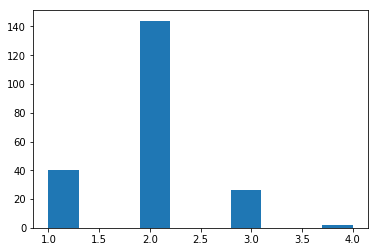

In [19]:
plt.hist(appointment_taken_time.astype('m8[m]'))

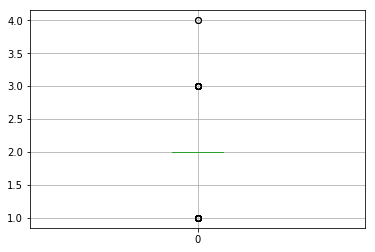

In [20]:
df_appointment_taken_time = pd.DataFrame(appointment_taken_time.astype('m8[m]'))
df_appointment_taken_time.plot.box(grid='True')

In [21]:
df_appointment_taken_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,1.95283,0.590318,1.0,2.0,2.0,2.0,4.0


### Similarly Notes Time can be analysed

In [22]:
df['notes_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['notes_in']))

In [23]:
df['notes_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['notes_out']))

In [24]:
notes_time =df['notes_out']-df['notes_in']

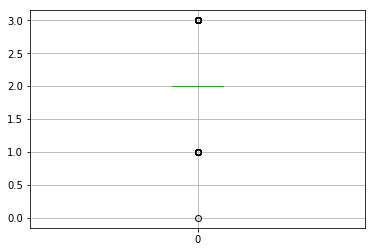

In [25]:
df_notes_time= pd.DataFrame(notes_time.astype('m8[m]'))
df_notes_time.plot.box(grid='True')

In [26]:
df_notes_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,2.033019,0.64127,0.0,2.0,2.0,2.0,3.0


(array([   1.,    0.,    0.,   37.,    0.,    0.,  128.,    0.,    0.,   46.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

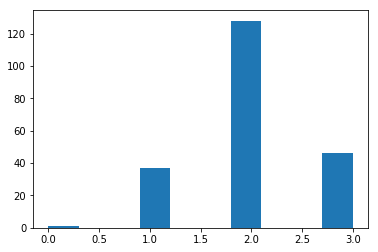

In [27]:
plt.hist(notes_time.astype('m8[m]'))

### Analysis of time spent in Waiting

In [28]:
df['waiting_area_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['waiting_area_in']))

In [29]:
df['waiting_area_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['waiting_area_out']))

In [30]:
wait_area_time =df['waiting_area_out']-df['waiting_area_in']

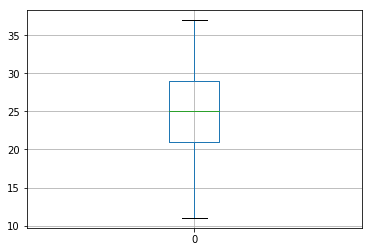

In [31]:
df_wait_area_time =pd.DataFrame(wait_area_time.astype('m8[m]'))
df_wait_area_time.plot.box(grid='True')

In [32]:
df_wait_area_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,24.679245,5.063665,11.0,21.0,25.0,29.0,37.0


(array([  2.,   8.,  20.,  31.,  25.,  47.,  38.,  23.,  14.,   4.]),
 array([ 11. ,  13.6,  16.2,  18.8,  21.4,  24. ,  26.6,  29.2,  31.8,
         34.4,  37. ]),
 <a list of 10 Patch objects>)

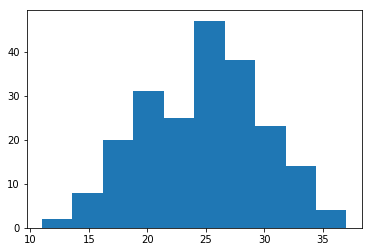

In [33]:
plt.hist(wait_area_time.astype('m8[m]'))

### Analysis of time spent in Medical examination

In [34]:
df['examination_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['examination_in']))

In [35]:
df['examination_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['examination_out']))

In [36]:
examination_time =df['examination_out']-df['examination_in']

In [37]:
df_examination_time =pd.DataFrame(examination_time.astype('m8[m]'))

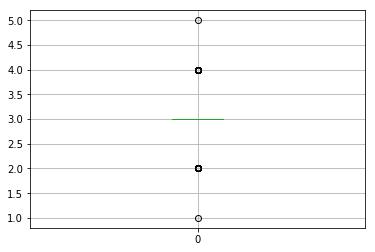

In [38]:
df_examination_time.plot.box(grid='True')

(array([   1.,    0.,   43.,    0.,    0.,  123.,    0.,   44.,    0.,    1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

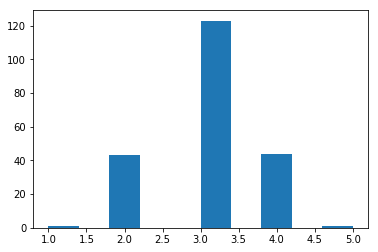

In [39]:
plt.hist(examination_time.astype('m8[m]'))

In [40]:
df_examination_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,3.004717,0.67098,1.0,3.0,3.0,3.0,5.0


### Examination Waiting time

In [41]:
df['examination_wait_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['examination_wait_in']))

In [42]:
df['examination_wait_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['examination_wait_out']))

In [43]:
examination_wait_time =df['examination_wait_out']-df['examination_wait_in']

In [44]:
df_examination_wait_time =pd.DataFrame(examination_wait_time.astype('m8[m]'))


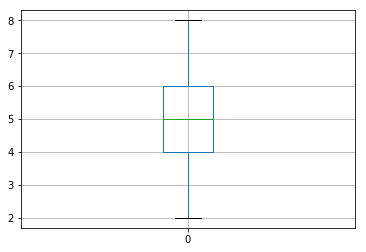

In [45]:
df_examination_wait_time.plot.box(grid='True')

In [46]:
df_examination_wait_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,4.966981,1.107426,2.0,4.0,5.0,6.0,8.0


(array([  1.,  16.,   0.,  57.,   0.,  72.,  50.,   0.,  13.,   3.]),
 array([ 2. ,  2.6,  3.2,  3.8,  4.4,  5. ,  5.6,  6.2,  6.8,  7.4,  8. ]),
 <a list of 10 Patch objects>)

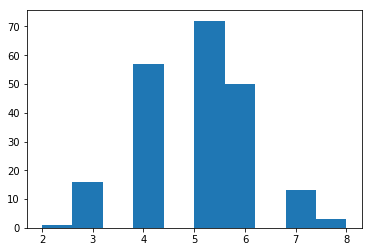

In [47]:
plt.hist(examination_wait_time.astype('m8[m]'))

### Analysis of time spent with doctor

In [48]:
df['doctor_in']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['doctor_in']))

In [49]:
df['doctor_out']= list(map(lambda x: datetime.datetime.strptime(x, '%m-%d-%Y %H:%M'), df['doctor_out']))

In [50]:
doctor_time =df['doctor_out']-df['doctor_in']

In [51]:
df_doctor_time =pd.DataFrame(doctor_time.astype('m8[m]'))

In [52]:
df_doctor_time.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212.0,12.353774,2.407007,7.0,11.0,12.0,14.0,19.0


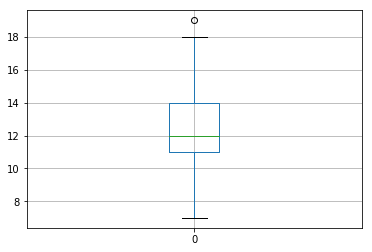

In [53]:
df_doctor_time.plot.box(grid='True')

(array([ 10.,  16.,  26.,  24.,  37.,  59.,  20.,  12.,   4.,   4.]),
 array([  7. ,   8.2,   9.4,  10.6,  11.8,  13. ,  14.2,  15.4,  16.6,
         17.8,  19. ]),
 <a list of 10 Patch objects>)

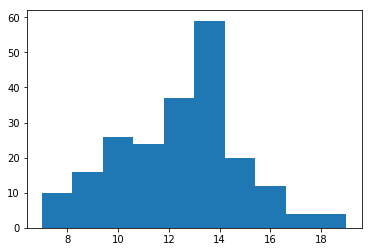

In [54]:
plt.hist(doctor_time.astype('m8[m]'))